In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import yfinance as yf

Now I need to read in all the seperated csvs

In [2]:
#Nike

Jordan84reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan84reg.csv')
Jordan84post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan84post.csv')

Jordan85reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan85reg.csv')
Jordan85post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan85post.csv')

Jordan86reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan86reg.csv')
Jordan86post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan86post.csv')

Jordan87reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan87reg.csv')
Jordan87post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan87post.csv')

Jordan88reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan88reg.csv')
Jordan88post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan88post.csv')

Jordan89reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan89reg.csv')
Jordan89post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan89post.csv')

Jordan90reg= pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan90reg.csv')
Jordan90post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan90post.csv')

Jordan91reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan91reg.csv')
Jordan91post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan91post.csv')

Jordan92reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan92reg.csv')
Jordan92post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan92post.csv')

Jordan94reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan94reg.csv')
Jordan94post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan94post.csv')

Jordan95reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan95reg.csv')
Jordan95post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan95post.csv')

Jordan96reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan96reg.csv')
Jordan96post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Jordan96post.csv')


#---------------------------------------------------------------------------------------------------------------------
#Anta - Klay Thompson

Thompson13reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson13reg.csv')
Thompson13post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson13post.csv')

Thompson14reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson14reg.csv')
Thompson14post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson14post.csv')

Thompson15reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson15reg.csv')
Thompson15post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson15post.csv')

Thompson16reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson16reg.csv')
Thompson16post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson16post.csv')

Thompson17reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson17reg.csv')
Thompson17post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson17post.csv')

Thompson18reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson17reg.csv')
Thompson18post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson18post.csv')

Thompson21reg = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson21reg.csv')
Thompson21post = pd.read_csv('/Users/noahmenachemson/Desktop/Quant Project/Thompson21post.csv')



print('All Player Data Imported!')

All Player Data Imported!


Now that all the data is imported, I want a single cleaned data set for each season's playoff and regular season games. Below is a function that joins the two after copying, adds a binary column for if the game is in the postseason, fixes missing or misreprented values, and converts all numeric columns to floats and dates to datetime.

In [3]:
def reg_and_post(reg_df, post_df):
    """
    Combine regular season and postseason game logs, clean formatting,
    drop summary/header rows, normalize home/away, convert numeric columns,
    fix Thompson non-numeric Rk rows, and DROP MP, Gcar, FT%.
    """
    
    # ----- Copy inputs -----
    reg = reg_df.copy()
    post = post_df.copy()
    
    # ----- Add postseason indicator -----
    reg["postseason"] = 0
    post["postseason"] = 1
    
    # ----- Combine both seasons -----
    combined = pd.concat([reg, post], ignore_index=True)
    
    # ----- Rename Unnamed: 5 → home/away -----
    if "Unnamed: 5" in combined.columns:
        combined = combined.rename(columns={"Unnamed: 5": "home/away"})
    
    # ----- Normalize home/away -----
    if "home/away" in combined.columns:
        combined["home/away"] = combined["home/away"].replace({
            "@": "away",
            "at": "away",
            "": "home"
        }).fillna("home")
    
    # ----- KEEP ONLY NUMERIC Rk rows (drops: AVG, headers, blank rows) -----
    combined = combined[pd.to_numeric(combined['Rk'], errors='coerce').notna()]
    
    # ----- Convert Date -----
    combined["Date"] = pd.to_datetime(combined["Date"], errors="coerce")
    combined = combined[combined["Date"].notna()]   # drop rows with no real date
    
    # ----- DROP MP, Gcar, FT% -----
    drop_cols = ["MP", "Gcar", "FT%", "3P%", "2P%"]
    for col in drop_cols:
        if col in combined.columns:
            combined = combined.drop(columns=[col])
    
    # ----- Move postseason to column index 3 -----
    cols = list(combined.columns)
    cols.insert(3, cols.pop(cols.index("postseason")))
    combined = combined[cols]
    
    # ----- Numeric columns to convert -----
    float_cols = [
        'FG','FGA','FG%','3P','3PA','2P','2PA','eFG%',
        'FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PF',
        'PTS','GmSc','+/-'
    ]
    
    for col in float_cols:
        if col in combined.columns:
            combined[col] = pd.to_numeric(combined[col], errors='coerce')
    
    return combined


Now that I have each year's cleaned dataset, I'll combine them into one bg data set for each player.

In [4]:
# Jordan
Jordan84 = reg_and_post(Jordan84reg, Jordan84post)
Jordan85 = reg_and_post(Jordan85reg, Jordan85post)
Jordan86 = reg_and_post(Jordan86reg, Jordan86post)
Jordan87 = reg_and_post(Jordan87reg, Jordan87post)
Jordan88 = reg_and_post(Jordan88reg, Jordan88post)
Jordan89 = reg_and_post(Jordan89reg, Jordan89post)
Jordan90 = reg_and_post(Jordan90reg, Jordan90post)
Jordan91 = reg_and_post(Jordan91reg, Jordan91post)
Jordan92 = reg_and_post(Jordan92reg, Jordan92post)
Jordan94 = reg_and_post(Jordan94reg, Jordan94post)
Jordan95 = reg_and_post(Jordan95reg, Jordan95post)
Jordan96 = reg_and_post(Jordan96reg, Jordan96post)



# Klay
Thompson13 = reg_and_post(Thompson13reg, Thompson13post)
Thompson14 = reg_and_post(Thompson14reg, Thompson14post)
Thompson15 = reg_and_post(Thompson15reg, Thompson15post)
Thompson16 = reg_and_post(Thompson16reg, Thompson16post)
Thompson17 = reg_and_post(Thompson17reg, Thompson17post)
Thompson18 = reg_and_post(Thompson18reg, Thompson18post)
Thompson21 = reg_and_post(Thompson21reg, Thompson21post)


JordanOverall = pd.concat([Jordan84, Jordan85, Jordan86, Jordan88, Jordan89, Jordan90, Jordan91, Jordan92, Jordan94, Jordan95, Jordan96])
ThompsonOverall = pd.concat([Thompson13, Thompson14, Thompson15, Thompson16, Thompson17, Thompson18, Thompson21])

JordanOverall

,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,1984-10-26,0,CHI,home,WSB,W 109-93,*,5.0,...,5.0,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN
1,2.0,2.0,1984-10-27,0,CHI,away,MIL,L 106-108,*,8.0,...,2.0,5.0,5.0,2.0,1.0,3.0,4.0,21.0,19.4,NaN
2,3.0,3.0,1984-10-29,0,CHI,home,MIL,W 116-110,*,13.0,...,2.0,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN
3,4.0,4.0,1984-10-30,0,CHI,away,KCK,W 109-104,*,8.0,...,2.0,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN
4,5.0,5.0,1984-11-01,0,CHI,away,DEN,L 113-129,*,7.0,...,2.0,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,15.0,15.0,1997-06-04,1,CHI,home,UTA,W 97-85,*,11.0,...,9.0,13.0,9.0,2.0,0.0,5.0,2.0,38.0,34.0,15.0
100,16.0,16.0,1997-06-06,1,CHI,away,UTA,L 93-104,*,9.0,...,3.0,3.0,6.0,1.0,2.0,1.0,1.0,26.0,19.9,-10.0
101,17.0,17.0,1997-06-08,1,CHI,away,UTA,L 73-78,*,11.0,...,3.0,4.0,4.0,0.0,0.0,3.0,3.0,22.0,7.7,-6.0
102,18.0,18.0,1997-06-11,1,CHI,away,UTA,W 90-88,*,13.0,...,5.0,7.0,5.0,3.0,1.0,3.0,3.0,38.0,29.4,4.0


Using the yfinance package, I'm able to access historical stock data. I've added a column for returns to quickly know whether the stock increased or decreased throughout a given day.

In [5]:
### NIKE

# Get Nike's ticker symbol
data = yf.Ticker("NKE")

# period options: "1mo", "3mo", "6mo", "1y", "5y", "10y", "ytd", "max"
nike = data.history(period="max", interval="1d").reset_index()

nike['Date'] = pd.to_datetime(nike['Date']).dt.date

nike['Returns'] = (nike['Close'] - nike['Open']) / nike['Open']

nike

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
0,1980-12-02,0.123572,0.126258,0.123572,0.123572,100710400,0.00,0.0,0.000000e+00
1,1980-12-03,0.122228,0.122228,0.120885,0.120885,25177600,0.00,0.0,-1.098836e-02
2,1980-12-04,0.124915,0.126258,0.124915,0.124915,22694400,0.00,0.0,-1.110979e-16
3,1980-12-05,0.120885,0.120885,0.118199,0.118199,7590400,0.00,0.0,-2.222081e-02
4,1980-12-08,0.112827,0.112827,0.111483,0.111483,5414400,0.00,0.0,-1.191008e-02
...,...,...,...,...,...,...,...,...,...
11339,2025-11-26,63.097169,64.458481,62.570532,63.921906,13791000,0.00,0.0,1.307089e-02
11340,2025-11-28,64.061020,64.369051,63.564192,64.220001,4941400,0.00,0.0,2.481713e-03
11341,2025-12-01,63.770000,65.989998,63.580002,65.389999,12047300,0.41,0.0,2.540378e-02
11342,2025-12-02,65.449997,65.470001,64.580002,64.930000,9051200,0.00,0.0,-7.944945e-03


In [6]:
### Anta

# Get Anta's ticker symbol
data = yf.Ticker("ANPDY")

# period options: "1mo", "3mo", "6mo", "1y", "5y", "10y", "ytd", "max"
anta = data.history(period="max", interval="1d").reset_index()

anta['Date'] = pd.to_datetime(anta['Date']).dt.date


anta['Returns'] = (anta['Close'] - anta['Open']) / anta['Open']

# Display the first few rows
anta

#NEED TO CALCULATE RETURNS (look it up)
#Switch to 3 player daily data and specifically when layers sign, win mvp, win championship, score most points in a season, etc.
#t test between 30 days before and 30 days after

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
0,2013-01-07,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.000000
1,2013-01-08,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.000000
2,2013-01-09,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.000000
3,2013-01-10,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.000000
4,2013-01-11,19.878176,19.878176,19.878176,19.878176,0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
3243,2025-11-26,273.170013,275.000000,270.010010,272.130005,1300,0.0,0.0,-0.003807
3244,2025-11-28,274.915985,275.049988,273.829987,273.829987,100,0.0,0.0,-0.003950
3245,2025-12-01,279.000000,279.000000,266.399994,270.630005,1600,0.0,0.0,-0.030000
3246,2025-12-02,275.755005,276.739990,274.605011,276.049988,1100,0.0,0.0,0.001070


In [7]:
def filter_by_year(df, start_year, end_year):
    """
    Filters a DataFrame to include only rows where 'Date' is between start_year and end_year (inclusive).
    
    Parameters:
        df (pd.DataFrame): DataFrame containing a 'Date' column.
        start_year (int): Starting year (inclusive).
        end_year (int): Ending year (inclusive).
    
    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    # Validate inputs
    assert isinstance(start_year, int), "start_year must be an integer"
    assert isinstance(end_year, int), "end_year must be an integer"
    assert 'Date' in df.columns, "DataFrame must contain a 'Date' column"

    # Make a copy to avoid modifying the original
    filtered = df.copy()
    
    # Ensure 'Date' is datetime
    filtered['Date'] = pd.to_datetime(filtered['Date'], errors='coerce')
    
    # Filter by year range
    filtered = filtered[
        (filtered['Date'].dt.year >= start_year) &
        (filtered['Date'].dt.year <= end_year)
    ]
    
    return filtered

In [8]:
JordanOverall = JordanOverall.dropna(subset=['Date'])

# Aggregate duplicate dates (sum or mean both work; sum is more typical for same-day games)
JordanOverallOrdered = (
    JordanOverall
    .groupby('Date', as_index=False)
    .agg({'GmSc': 'sum'})  # or 'mean'
)

# Ensure Nike data also has unique dates
nike = nike.dropna(subset=['Date'])
#nike_grouped_returns = nike.groupby('Date', as_index=False).agg({'Returns': 'mean'})
JordanOverall


,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,1984-10-26,0,CHI,home,WSB,W 109-93,*,5.0,...,5.0,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN
1,2.0,2.0,1984-10-27,0,CHI,away,MIL,L 106-108,*,8.0,...,2.0,5.0,5.0,2.0,1.0,3.0,4.0,21.0,19.4,NaN
2,3.0,3.0,1984-10-29,0,CHI,home,MIL,W 116-110,*,13.0,...,2.0,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN
3,4.0,4.0,1984-10-30,0,CHI,away,KCK,W 109-104,*,8.0,...,2.0,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN
4,5.0,5.0,1984-11-01,0,CHI,away,DEN,L 113-129,*,7.0,...,2.0,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,15.0,15.0,1997-06-04,1,CHI,home,UTA,W 97-85,*,11.0,...,9.0,13.0,9.0,2.0,0.0,5.0,2.0,38.0,34.0,15.0
100,16.0,16.0,1997-06-06,1,CHI,away,UTA,L 93-104,*,9.0,...,3.0,3.0,6.0,1.0,2.0,1.0,1.0,26.0,19.9,-10.0
101,17.0,17.0,1997-06-08,1,CHI,away,UTA,L 73-78,*,11.0,...,3.0,4.0,4.0,0.0,0.0,3.0,3.0,22.0,7.7,-6.0
102,18.0,18.0,1997-06-11,1,CHI,away,UTA,W 90-88,*,13.0,...,5.0,7.0,5.0,3.0,1.0,3.0,3.0,38.0,29.4,4.0


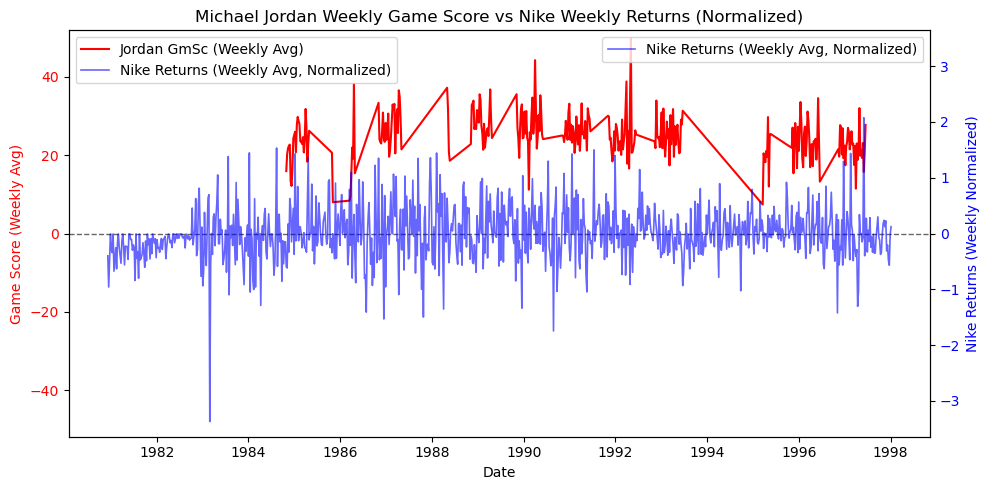

In [9]:
# --- Convert Date columns to datetime ---
JordanOverall['Date'] = pd.to_datetime(JordanOverall['Date'])
nike['Date'] = pd.to_datetime(nike['Date'])

# --- Filter Nike data before 1998 ---
nikefilter97 = nike[nike['Date'] < '1998-01-01'].copy()

# --- Normalize Nike returns (z-score normalization) ---
nikefilter97['Returns_norm'] = (nikefilter97['Returns'] - nikefilter97['Returns'].mean()) / nikefilter97['Returns'].std()

# --- Aggregate to weekly data ---
JordanWeekly = (
    JordanOverall
    .groupby(pd.Grouper(key='Date', freq='W'))
    .agg({'GmSc': 'mean'})
    .reset_index()
)

NikeWeekly = (
    nikefilter97
    .groupby(pd.Grouper(key='Date', freq='W'))
    .agg({'Returns_norm': 'mean'})
    .reset_index()
)

# --- Create figure and axes ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Plot Jordan Weekly GmSc ---
sns.lineplot(
    data=JordanWeekly,
    x='Date',
    y='GmSc',
    color='red',
    linewidth=1.5,
    label='Jordan GmSc (Weekly Avg)',
    ax=ax1
)
ax1.set_ylabel('Game Score (Weekly Avg)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# --- Plot Nike Weekly Normalized Returns ---
ax2 = ax1.twinx()
sns.lineplot(
    data=NikeWeekly,
    x='Date',
    y='Returns_norm',
    color='blue',
    linewidth=1.2,
    alpha=0.6,
    label='Nike Returns (Weekly Avg, Normalized)',
    ax=ax2
)
ax2.set_ylabel('Nike Returns (Weekly Normalized)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# --- Align both 0 baselines perfectly (centered) ---
y1_limit = max(abs(ax1.get_ylim()[0]), abs(ax1.get_ylim()[1]))
ax1.set_ylim(-y1_limit, y1_limit)

y2_limit = max(abs(ax2.get_ylim()[0]), abs(ax2.get_ylim()[1]))
ax2.set_ylim(-y2_limit, y2_limit)

# --- Add horizontal line at y=0 ---
ax1.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.6)

# --- Formatting ---
ax1.set_xlabel('Date')
plt.title('Michael Jordan Weekly Game Score vs Nike Weekly Returns (Normalized)')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
#CumSum calculation

# --- Prepare Jordan data ---
JordanOverallOrdered = (
    JordanOverall
    .copy()
    .sort_values('Date')
    .groupby('Date', as_index=False)
    .agg({'GmSc': 'sum'})  # aggregate duplicates by date
)

JordanOverallOrdered['Cumulative_GmSc'] = JordanOverallOrdered['GmSc'].cumsum()
JordanOverallOrdered

,Date,GmSc,Cumulative_GmSc
0,1984-10-26,12.5,12.5
1,1984-10-27,19.4,31.9
2,1984-10-29,32.9,64.8
3,1984-10-30,14.7,79.5
4,1984-11-01,13.2,92.7
...,...,...,...
902,1997-06-04,34.0,22605.8
903,1997-06-06,19.9,22625.7
904,1997-06-08,7.7,22633.4
905,1997-06-11,29.4,22662.8


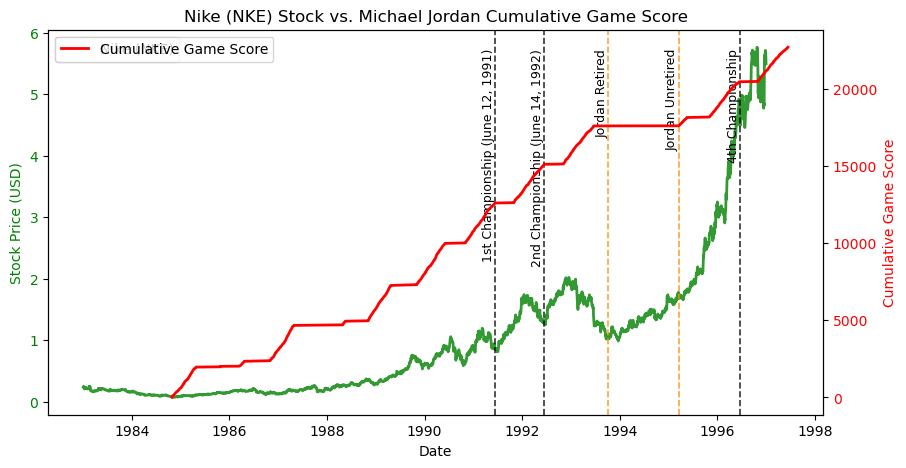

In [11]:
nikefiltered = filter_by_year(nike, 1983, 1996)

#  Create figure 
fig, ax1 = plt.subplots(figsize=(10, 5))

#  Nike stock price (left y-axis)---
sns.lineplot(
    data=nikefiltered,
    x='Date',
    y='Close',
    color='green',
    linewidth=2,
    alpha=0.8,
    label='Nike (NKE)',
    ax=ax1
)
ax1.set_ylabel("Stock Price (USD)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

#  Cumulative GmSc (right y-axis) 
ax2 = ax1.twinx()
sns.lineplot(
    data=JordanOverallOrdered,
    x='Date',
    y='Cumulative_GmSc',
    color='red',
    linewidth=2,
    label='Cumulative Game Score',
    ax=ax2
)
ax2.set_ylabel("Cumulative Game Score", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Event Lines
dates = [
    #'May 25, 1988',   # First MVP
    #'March 28, 1990', # Career high 69 points
    'June 12, 1991',   # Won Championship
    'June 14, 1992',   # Won Championship
    #'June 20, 1993',
    #'July 23, 1993',   # Jordan's dad died
    'October 6, 1993',  # Jordan retired, revenue dropped 22% (https://www.essentiallysports.com/nba-legends-basketball-news-michael-jordan-nike-had-big-issues-after-company-suffered-massive-financial-loss-in-nineteen-ninety-three/?)
    'March 19, 1995',   # Jordan came back
    'June 16, 1996'    # Won Championship

]
labels = ['1st Championship (June 12, 1991)', '2nd Championship (June 14, 1992)', 'Jordan Retired', 'Jordan Unretired', '4th Championship']
event_dates = pd.to_datetime(dates)

for d, label in zip(event_dates, labels):
    color = 'darkorange' if 'retired' in label.lower() else 'black'

    ax1.axvline(x=d, color=color, linestyle='--', linewidth=1.2, alpha=0.8)
    ax1.text(d, ax1.get_ylim()[1]*0.95, label, rotation=90,
             va='top', ha='right', fontsize=9, color='black')

#  Styling 
plt.title("Nike (NKE) Stock vs. Michael Jordan Cumulative Game Score")
plt.show()

In [12]:
jordandates = [
    'June 12, 1991',   # Won Championship
    'June 14, 1992',   # Won Championship
    'March 19, 1995',   # Jordan came back
]

def event_ttests(stock_data, event_dates, window_days=30, col='Close'):
    """
    Performs Welch t-tests comparing mean values of `col` 
    before and after each event date within a specified window.

    Parameters:
        stock_data (pd.DataFrame): DataFrame with 'Date' and `col` columns
        event_dates (list): list of event date strings
        window_days (int): number of days before/after each event to compare
        col (str): column to test (e.g., 'Returns', 'Close')

    Returns:
        pd.DataFrame: DataFrame with t-test results
    """
    window = pd.Timedelta(days=window_days)
    results = []

    for date_str in event_dates:
        cutoff = pd.to_datetime(date_str)
        start_date = cutoff - window
        end_date = cutoff + window

        
        before = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] < cutoff)][col]
        after = stock_data[(stock_data['Date'] >= cutoff) & (stock_data['Date'] <= end_date)][col]
        
        
        t_stat, p_val = ttest_ind(before, after, equal_var=False, nan_policy='omit')

        #print(f"--- {date_str} ---")
        #print(f"t-statistic: {t_stat:.4f}")
        #print(f"p-value:     {p_val:.4f}")
        #print(f"Mean before: {before.mean():.4f}, Mean after: {after.mean():.4f}")
        #print()

        results.append((cutoff, t_stat, p_val, before.mean(), after.mean()))



    return pd.DataFrame(results, columns=['Date', 't-stat', 'p-value', 'Mean Before', 'Mean After'])

champ_1jordan = {}
champ_2jordan = {}
unretired = {}

for i in range(25, 75):
    df = event_ttests(nike, jordandates, window_days=i, col='Returns')
    champ_1jordan[i] = df.loc[0, 'p-value']
    champ_2jordan[i] = df.loc[1, 'p-value']
    unretired[i] = df.loc[2, 'p-value']


event_ttests(nike, jordandates, window_days=50, col='Returns')

,Date,t-stat,p-value,Mean Before,Mean After
0,1991-06-12,-2.255601,0.027278,-0.006144,0.005029
1,1992-06-14,-2.116879,0.038045,-0.002484,0.008578
2,1995-03-19,0.638655,0.525254,0.001615,-0.000240


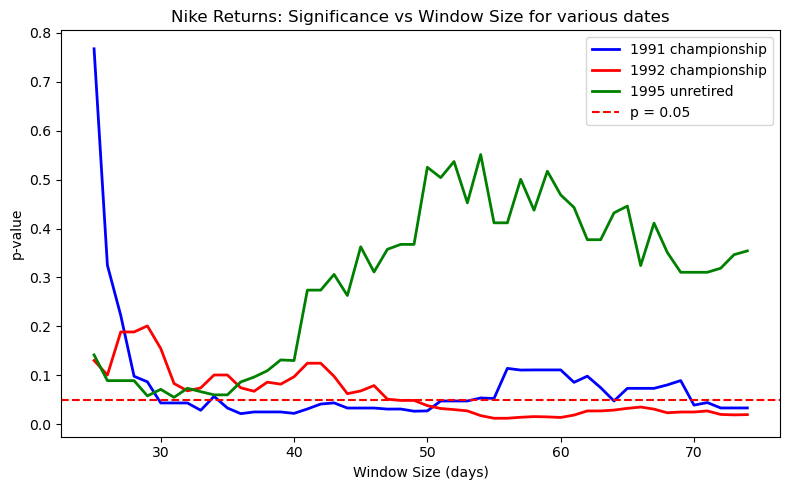

In [13]:
'''
For Reference:

jordandates = [
    'June 12, 1991',   # Won Championship
    'June 14, 1992',   # Won Championship
    'March 19, 1995',   # Jordan came back
]

'''

champ1_dfjordan = pd.DataFrame({
    'Window Size': list(champ_1jordan.keys()),
    'p-value': list(champ_1jordan.values())
})

champ2_dfjordan = pd.DataFrame({
    'Window Size': list(champ_2jordan.keys()),
    'p-value': list(champ_2jordan.values())
})

unretired_df = pd.DataFrame({
    'Window Size': list(unretired.keys()),
    'p-value': list(unretired.values())
})

plt.figure(figsize=(8,5))
sns.lineplot(data=champ1_dfjordan, x='Window Size', y='p-value', color='blue', linewidth=2, label = '1991 championship')
sns.lineplot(data=champ2_dfjordan, x='Window Size', y='p-value', color='red', linewidth=2, label = '1992 championship')
sns.lineplot(data=unretired_df, x='Window Size', y='p-value', color='green', linewidth=2, label = '1995 unretired')


plt.axhline(0.05, color='red', linestyle='--', label='p = 0.05') # significance line

plt.title("Nike Returns: Significance vs Window Size for various dates")
plt.xlabel("Window Size (days)")
plt.ylabel("p-value")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
#CumSum calculation

# Prepare Thompson data 
ThompsonOverallOrdered = (
    ThompsonOverall
    .copy()
    .sort_values('Date')
    .groupby('Date', as_index=False)
    .agg({'GmSc': 'sum'})  # aggregate duplicates by date
)

ThompsonOverallOrdered['Cumulative_GmSc'] = ThompsonOverallOrdered['GmSc'].cumsum()
ThompsonOverallOrdered

,Date,GmSc,Cumulative_GmSc
0,2013-10-30,30.1,30.1
1,2013-10-31,5.7,35.8
2,2013-11-02,21.8,57.6
3,2013-11-04,10.7,68.3
4,2013-11-06,21.8,90.1
...,...,...,...
583,2022-06-05,0.5,8384.6
584,2022-06-08,20.2,8404.8
585,2022-06-10,10.4,8415.2
586,2022-06-13,15.7,8430.9


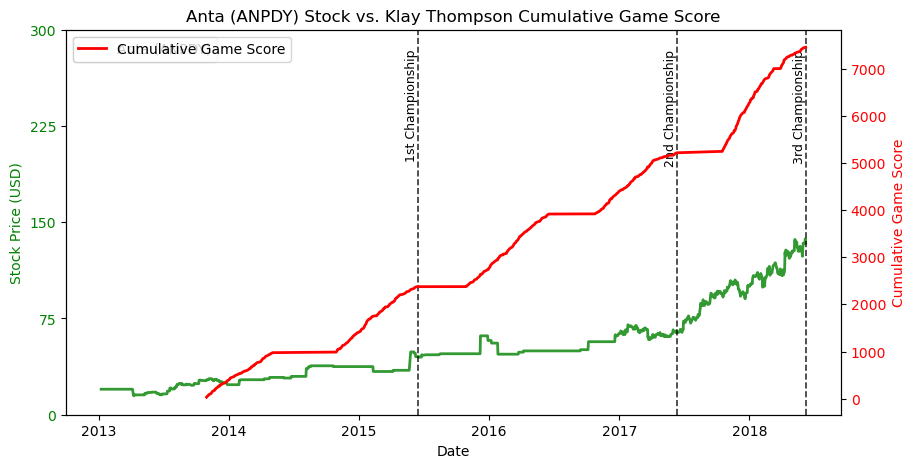

In [15]:
cutoff_date = pd.to_datetime('2018-06-08')
antafiltered = filter_by_year(anta, 2013, 20122)

#Filter up to that date
ThompsonOverallFiltered = ThompsonOverallOrdered[ThompsonOverallOrdered['Date'] <= cutoff_date]
antafiltered = antafiltered[antafiltered['Date'] <= cutoff_date]

#ThompsonOverallFiltered = ThompsonOverallOrdered[ThompsonOverallOrdered['Date'].dt.year <= 2017]

#  Create figure 
fig, ax1 = plt.subplots(figsize=(10, 5))

#  Anta stock price (left y-axis) 
sns.lineplot(
    data=antafiltered,
    x='Date',
    y='Close',
    color='green',
    linewidth=2,
    alpha=0.8,
    label='Anta (ANPDY)',
    ax=ax1
)

ax1.set_ylim(0, 300)
ax1.set_yticks([0, 75, 150, 225, 300])

ax1.set_ylabel("Stock Price (USD)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

#  Cumulative GmSc (right y-axis) 
ax2 = ax1.twinx()
sns.lineplot(
    data=ThompsonOverallFiltered,
    x='Date',
    y='Cumulative_GmSc',
    color='red',
    linewidth=2,
    label='Cumulative Game Score',
    ax=ax2
)
ax2.set_ylabel("Cumulative Game Score", color='red')
ax2.tick_params(axis='y', labelcolor='red')

#  Event Lines 
dates = [
    'June 16, 2015',  # Won Championship
    'June 12, 2017', # Won Championship
    'June 8, 2018' # Won Championship
]


labels = ['1st Championship', '2nd Championship', '3rd Championship']

event_dates = pd.to_datetime(dates)

for d, label in zip(event_dates, labels):
    color = 'darkorange' if 'retired' in label.lower() else 'black'

    ax1.axvline(x=d, color=color, linestyle='--', linewidth=1.2, alpha=0.8)
    ax1.text(d, ax1.get_ylim()[1]*0.95, label, rotation=90,
             va='top', ha='right', fontsize=9, color='black')

#  Styling 
plt.title("Anta (ANPDY) Stock vs. Klay Thompson Cumulative Game Score")
plt.show()

In [16]:
# t-test for the periods before and after the spike points
# Correlation test to find p-value
# add column to classify if the next day is higher

In [17]:
thompsondates = [
    'June 16, 2015',  # Won Championship
    'June 12, 2017', # Won Championship
    'June 8, 2018' # Won Championship
]

def event_ttests(stock_data, event_dates, window_days=30, col='Close'):
    """
    Performs Welch t-tests comparing mean values of `col` 
    before and after each event date within a specified window.

    Parameters:
        stock_data (pd.DataFrame): DataFrame with 'Date' and `col` columns
        event_dates (list): list of event date strings
        window_days (int): number of days before/after each event to compare
        col (str): column to test (e.g., 'Returns', 'Close')

    Returns:
        pd.DataFrame: DataFrame with t-test results
    """
    window = pd.Timedelta(days=window_days)
    results = []

    for date_str in event_dates:
        cutoff = pd.to_datetime(date_str)
        start_date = cutoff - window
        end_date = cutoff + window

        
        before = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] < cutoff)][col]
        after = stock_data[(stock_data['Date'] >= cutoff) & (stock_data['Date'] <= end_date)][col]
        
        
        t_stat, p_val = ttest_ind(before, after, equal_var=False, nan_policy='omit')

        #print(f"--- {date_str} ---")
        #print(f"t-statistic: {t_stat:.4f}")
        #print(f"p-value:     {p_val:.4f}")
        #print(f"Mean before: {before.mean():.4f}, Mean after: {after.mean():.4f}")
        #print()

        results.append((cutoff, t_stat, p_val, before.mean(), after.mean()))



    return pd.DataFrame(results, columns=['Date', 't-stat', 'p-value', 'Mean Before', 'Mean After'])

champ_1thomp = {}
champ_2thomp = {}
champ_3thomp = {}

for i in range(0, 150):
    df = event_ttests(nike, thompsondates, window_days=i, col='Returns')
    champ_1thomp[i] = df.loc[0, 'p-value']
    champ_2thomp[i] = df.loc[1, 'p-value']
    champ_3thomp[i] = df.loc[2, 'p-value']


event_ttests(nike, thompsondates, window_days=35, col='Returns')

/opt/anaconda3/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


,Date,t-stat,p-value,Mean Before,Mean After
0,2015-06-16,-0.179542,0.858304,-0.000367,-0.000008
1,2017-06-12,-0.814691,0.420016,-0.000278,0.002103
2,2018-06-08,1.806290,0.077865,0.004094,-0.000472


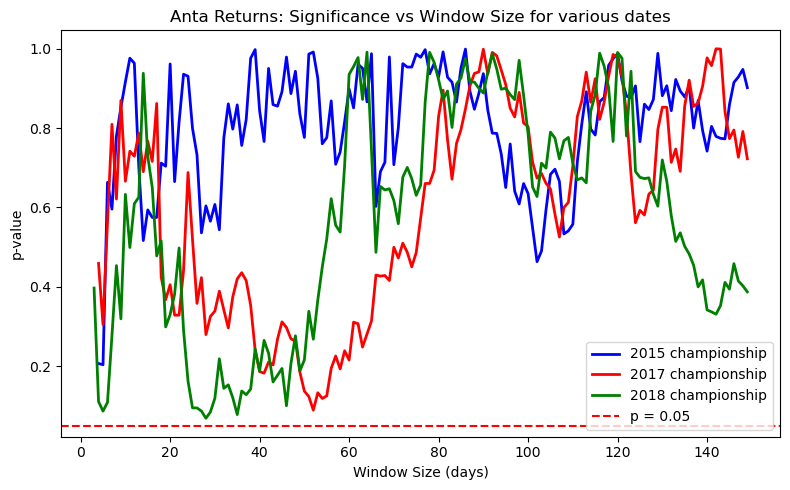

In [18]:
'''
For Reference:

thompsondates = [
    'June 16, 2015',  # Won Championship
    'June 12, 2017', # Won Championship
    'June 8, 2018' # Won Championship
]

'''

champ1_dfthomp = pd.DataFrame({
    'Window Size': list(champ_1thomp.keys()),
    'p-value': list(champ_1thomp.values())
})

champ2_dfthomp = pd.DataFrame({
    'Window Size': list(champ_2thomp.keys()),
    'p-value': list(champ_2thomp.values())
})

champ3_dfthomp = pd.DataFrame({
    'Window Size': list(champ_3thomp.keys()),
    'p-value': list(champ_3thomp.values())
})

plt.figure(figsize=(8,5))
sns.lineplot(data=champ1_dfthomp, x='Window Size', y='p-value', color='blue', linewidth=2, label = '2015 championship')
sns.lineplot(data=champ2_dfthomp, x='Window Size', y='p-value', color='red', linewidth=2, label = '2017 championship')
sns.lineplot(data=champ3_dfthomp, x='Window Size', y='p-value', color='green', linewidth=2, label = '2018 championship')


plt.axhline(0.05, color='red', linestyle='--', label='p = 0.05') # significance line

plt.title("Anta Returns: Significance vs Window Size for various dates")
plt.xlabel("Window Size (days)")
plt.ylabel("p-value")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
latest_date = JordanOverall['Date'].sort_values(ascending=False).iloc[0] #oct 26 1984
earliest_date = JordanOverall['Date'].sort_values(ascending=False).iloc[-1] #june 13 1997
JordanOverall

,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,1.0,1984-10-26,0,CHI,home,WSB,W 109-93,*,5.0,...,5.0,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN
1,2.0,2.0,1984-10-27,0,CHI,away,MIL,L 106-108,*,8.0,...,2.0,5.0,5.0,2.0,1.0,3.0,4.0,21.0,19.4,NaN
2,3.0,3.0,1984-10-29,0,CHI,home,MIL,W 116-110,*,13.0,...,2.0,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN
3,4.0,4.0,1984-10-30,0,CHI,away,KCK,W 109-104,*,8.0,...,2.0,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN
4,5.0,5.0,1984-11-01,0,CHI,away,DEN,L 113-129,*,7.0,...,2.0,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,15.0,15.0,1997-06-04,1,CHI,home,UTA,W 97-85,*,11.0,...,9.0,13.0,9.0,2.0,0.0,5.0,2.0,38.0,34.0,15.0
100,16.0,16.0,1997-06-06,1,CHI,away,UTA,L 93-104,*,9.0,...,3.0,3.0,6.0,1.0,2.0,1.0,1.0,26.0,19.9,-10.0
101,17.0,17.0,1997-06-08,1,CHI,away,UTA,L 73-78,*,11.0,...,3.0,4.0,4.0,0.0,0.0,3.0,3.0,22.0,7.7,-6.0
102,18.0,18.0,1997-06-11,1,CHI,away,UTA,W 90-88,*,13.0,...,5.0,7.0,5.0,3.0,1.0,3.0,3.0,38.0,29.4,4.0


In [20]:
nike_datef = nike[
    (earliest_date <= nike['Date']) & 
    (nike['Date'] <= latest_date + pd.Timedelta(days=1))
]
nike_datef

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
988,1984-10-26,0.084620,0.084620,0.080590,0.081933,5683200,0.0,0.0,-0.031744
989,1984-10-29,0.081934,0.083277,0.079247,0.080590,4832000,0.0,0.0,-0.016392
990,1984-10-30,0.080590,0.080590,0.077904,0.079247,7558400,0.0,0.0,-0.016674
991,1984-10-31,0.079247,0.080590,0.071188,0.073874,17120000,0.0,0.0,-0.067792
992,1984-11-01,0.073874,0.076560,0.072531,0.075217,14950400,0.0,0.0,0.018181
...,...,...,...,...,...,...,...,...,...
4176,1997-06-09,5.189856,5.258596,5.086746,5.224226,16161600,0.0,0.0,0.006623
4177,1997-06-10,5.270055,5.396078,5.247141,5.327338,15350400,0.0,0.0,0.010870
4178,1997-06-11,5.327336,5.407532,5.315879,5.396076,18057600,0.0,0.0,0.012903
4179,1997-06-12,5.407535,5.430448,5.292968,5.361708,16356000,0.0,0.0,-0.008475


In [21]:
jordan_nike_knn = JordanOverall.merge(
    nike_datef[['Date', 'Returns']],
    on='Date',
    how='right'      # keep ALL dates & ALL returns from stock
)

jordan_nike_knn

,Rk,Gtm,Date,postseason,Team,home/away,Opp,Result,GS,FG,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Returns
0,1.0,1.0,1984-10-26,0.0,CHI,home,WSB,W 109-93,*,5.0,...,6.0,7.0,2.0,4.0,5.0,2.0,16.0,12.5,NaN,-0.031744
1,3.0,3.0,1984-10-29,0.0,CHI,home,MIL,W 116-110,*,13.0,...,4.0,5.0,6.0,2.0,3.0,4.0,37.0,32.9,NaN,-0.016392
2,4.0,4.0,1984-10-30,0.0,CHI,away,KCK,W 109-104,*,8.0,...,4.0,5.0,3.0,1.0,6.0,5.0,25.0,14.7,NaN,-0.016674
3,NaN,NaN,1984-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067792
4,5.0,5.0,1984-11-01,0.0,CHI,away,DEN,L 113-129,*,7.0,...,5.0,5.0,1.0,1.0,2.0,4.0,17.0,13.2,NaN,0.018181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,NaN,NaN,1997-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006623
3189,NaN,NaN,1997-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010870
3190,18.0,18.0,1997-06-11,1.0,CHI,away,UTA,W 90-88,*,13.0,...,7.0,5.0,3.0,1.0,3.0,3.0,38.0,29.4,4.0,0.012903
3191,NaN,NaN,1997-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008475


In [22]:
# START OF KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


feature_cols = [
    'PTS','TRB','AST','STL','BLK','TOV','PF','GmSc','postseason'
]

# 1. Create target BEFORE dropping rows
jordan_nike_knn['Target'] = (jordan_nike_knn['Returns'].shift(-1) > 0).astype(int)

# 2. Drop rows that cannot be used
games_only = jordan_nike_knn.dropna(subset=feature_cols + ['Target'])

# 3. Extract features & labels
X = games_only[feature_cols]
y = games_only['Target']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 5. Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 6. Train KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_s, y_train)

# 7. Predict
preds = knn.predict(X_test_s)

# 8. Results
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.5365853658536586
Confusion Matrix:
 [[43 27]
 [30 23]]
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        70
           1       0.46      0.43      0.45        53

    accuracy                           0.54       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.53      0.54      0.53       123



In [23]:
# 1. Create target BEFORE dropping rows
jordan_nike_knn['Target'] = (jordan_nike_knn['Returns'].shift(-1) > 0).astype(int)

# 2. Drop rows that cannot be used
df = jordan_nike_knn.dropna(subset=feature_cols + ['Target'])

# 3. Split features and labels
X = df[feature_cols]
y = df['Target']

# 4. Time-series split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 5. Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 6. Logistic Regression
log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=500
)
log_reg.fit(X_train_s, y_train)

# 7. Predict
preds = log_reg.predict(X_test_s)

# 8. Results
print("Accuracy:", accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))


Accuracy: 0.4959349593495935
[[40 30]
 [32 21]]
